<div class="alert alert-block alert-info"><b>IAB303</b> - Data Analytics for Business Insight</div>

# Week 2 Studio :: The Data Analytics Cycle

---

## Why Data Analytics?

Imagine:
* You've just started a new job
* Marketing manager drops into your office with a problem: Our competition is overtaking us. Our customers seem to be turning away from our product. We don't know why. Can you help?

Consider:
* How significant is this problem for the business?
* What information do you need to address this concern?
* How do you go about obtaining this information?

### Human Intelligence as a starting point

* How does the Marketing manager describe the problem?
* What does their gut feeling, their intuition tell them?
* At a guess, why do they think this happening?

* The importance of intuition
* The risks of intuition

#### What value is Data Analytics for this scenario?

## Example

Say we want to find out what customers have been saying about our product that we are selling on Amazon...

[Data from Kaggle](https://www.kaggle.com/bittlingmayer/amazonreviews)

In [1]:
# Load first 50 of 400,000 Amazon reviews (out of total dataset of 4 million)
pathToData = "data/kaggle-amazon_reviews-first50.txt"

# How big is this file?
import os
fileSize = os.stat(pathToData).st_size / (1024)
print("File size: ",fileSize, "KB")

File size:  22.6171875 KB


In [2]:
# Now lets define a function to load the reviews
def readFileToList(fileName):
    file = open(fileName)
    rawtext = file.read()
    file.close()
    return rawtext.split("\n")

# Read the data into a List and assign to variable
reviewData = readFileToList(pathToData)

# Now lets check how many items in the list
numReviews = len(reviewData)

print("Number of reviews: ",numReviews)

Number of reviews:  50


In [3]:
# Let's look at the first and last reviews
print("First: ",reviewData[0]) # Why 0?
print("Last:",reviewData[-1])

First:  __label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"
Last: __label__2 Patricia Cornwell has turned me into a reader: I was never really a big reader before and somebody put me on to Patricia Cornwell. Well, now I can't put her books down. Her books just get better and better as you go through the Kay Scarpetta series.I really enjoy the series concept and the fact that some of the same characters keep returning from book to book. It's nice to see the characters develop through each story line. It

In [4]:
# 2nd last item
reviewData[-2]

"__label__1 Okay but Messy....: We purchased this bag for a vacation we were taking a cruise and we wanted to use it when we left the ship. The bag was convenient to carry, however the faux leather began peeling. At first it wasn't so bad but then it became annoying because it then began flaking all over your skin and clothes. I would have rather the bag been a cloth bag with no flaking than the faux leather that I had to keep wisking away from my skin and clothes."

### Making sense

* How do we make meaning of this data?
* What intuitions might we have on the data?
* How do we test these intuitions?
* What do we need to do to make this raw data useful?

In [5]:
# What if we just want the CD reviews?
cdReviews = list(filter(lambda text: "CD" in text,reviewData))

# How many now?
print("CD reviews: ",len(cdReviews))

# Let's check the first few
cdReviews[0:3]

CD reviews:  6


['__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"',
 '__label__1 A complete Bust: This game requires quicktime 5.0 to work...if you have a better version of quicktime (I have 7.5), it will ask you to install the quicktime available on the CD...if you click no, it will not let you play. So, I begrudgingly clicked yes on the third try, and it installed quicktime 5, THEN it tells me to please install the quicktime available on the disc. It KEPT telling me that, even after I uninstalled my version of

### Not so easy :(

* How long did take you to spot the problem in the first 3 reviews?
* How easy would it be to do with 21,178 reviews?
* What about millions?
* What is the computer good at?
* What is the computer bad at?
* What are humans good at?
* What are humans bad at?

---

## The Data Analytics Cycle


For this unit, we are concerned with more than just data analytics, we are interested in what is *appropriate, efficous, ethical ...* what is the ***right*** kind of analytics to help provide the ***right*** kind of insights for business.

In doing Data Analytics, we will follow a cycle - **QDAVI** - to address a business concern:

1. **Q**uestion
2. **D**ata
3. **A**nalysis
4. **V**isualisation
5. **I**nsight

<img src="graphics/QDAVI_cycle_sm.png" width="50%" />

### 1. QUESTION

**Concern:** Getting to know eachother in IAB303

> What aspects of IT are students mostly interested, and how does Data Analytics fit with these interests?

### 2. Data

Select and load data

In [6]:
# import a Python library for working with tabular data
import pandas as pd

# read our data into a dataframe variable (df)
df = pd.read_csv('data/IAB303_info.csv') 

# print out the column headings
for heading in df.columns:
    print(heading)

stud_num
course
mode
lab
workshop


### 3. Analysis

We can ask questions of this data like how many students are there?

In [7]:
# The dimensional shape of the dataframe
df.shape

(120, 5)

In [8]:
#We only want the number of rows
df.shape[0]

120

In [9]:
print("There are {} students represented in the data".format(df.shape[0]))

There are 120 students represented in the data


OR our original question: Which courses are IAB303 students from?

In [10]:
df.course.unique()

array(['IN01', 'IX22', 'U095', 'SE60', 'ST01', 'IX56', 'BS05', 'IX69'],
      dtype=object)

But perhaps what is more useful is to know how many students are from each course...

In [11]:
courseNums = df.groupby('course')['stud_num'].count()
courseNums

course
BS05     2
IN01    86
IX22    22
IX56     2
IX69     1
SE60     5
ST01     1
U095     1
Name: stud_num, dtype: int64

### 4. Visualisation

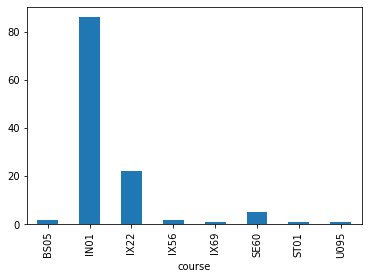

In [12]:
import matplotlib.pyplot as plt
courseNums.plot(kind="bar")
plt.show()

### 5. Insight

To actually make this insightful for our 'business' we need to (a) make clear what the chart is, and (b) explain the course codes.

In [13]:
# set some important variables with the extra info
chartTitle="Number of IAB303 students by course"
yaxisLabel="number of students"
courses = {
    "BS05":"Bachelor of Business",
    "IN01":"Bachelor of IT",
    "IX22":"Bachelor of Business/Bachelor of Information Technology",
    "IX56":"Bachelor of Creative Industries/Bachelor of Information Technology",
    "IX69":"Bachelor of Fine Arts (Interactive and Visual Design)/Bachelor of Information Technology",
    "SE60":"Bachelor of Engineering (Honours)/Bachelor of Information Technology",
    "ST01":"Bachelor of Science",
    "U095":"University Exchange Year"
}

print("IAB303 students are from {} courses".format(len(courses)))

IAB303 students are from 8 courses


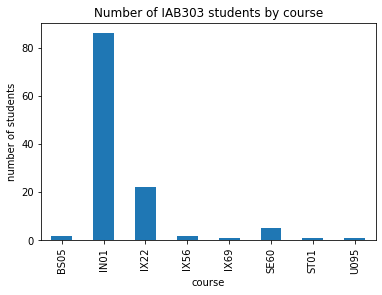

BS05 - Bachelor of Business
IN01 - Bachelor of IT
IX22 - Bachelor of Business/Bachelor of Information Technology
IX56 - Bachelor of Creative Industries/Bachelor of Information Technology
IX69 - Bachelor of Fine Arts (Interactive and Visual Design)/Bachelor of Information Technology
SE60 - Bachelor of Engineering (Honours)/Bachelor of Information Technology
ST01 - Bachelor of Science
U095 - University Exchange Year


In [14]:
courseNums.plot.bar(ax=plt.axes(title=chartTitle,ylabel = yaxisLabel))
plt.show()
for code,name in courses.items():
    print("{} - {}".format(code,name))

---

## The Big Idea: Addressing business concerns through storytelling with information

1. **CONCERN:** The business concern or problem understood in the context of the business and relation to the stakeholders.

2. **DATA ANALYTICS:** Potential sources of information that exist inside or outside of the business or which may be synthesised in order to address a business concern. Techniques and processes and tools which can be utilised in analysing available data for the purposes of addressing a business concern.

4. **MEANING:** Relationships, perspectives, narratives, and understandings that are supported by the data analytics in a way that is meaningful for stakeholders and holds efficacy in addressing a business concern.

### CONCERN

* what kind of problem - is it a business problem?
* who are the stakeholders?
* what is the context?
* business model disruption
* talent management
* global market trends
* foresight
* political risk


#### LEARN MORE

> "If you aren't harnessing the power of data, you're almost certain to end up falling behind."
>
> [The Top Issues CEOs Face These Days (2014)](https://www.wsj.com/articles/executive-leadership-what-are-the-top-issues-ceos-face-these-days-1395267060)

> "Don't ever try and present a technology solution to a business problem"
>
> [Technology Solutions Do Not Always Solve Business Problems](https://youtu.be/J7XAFa4wXgY)


#### LEARN MORE

> "Competitive innovation waits for no one"
>
> [Worst Company Disasters! | Top 6 Blunders](https://youtu.be/T0Z73Zbtlyg) (16 mins)

> "You promised me Mars colonies. Instead, I got Facebook."
>
> [Jason Pontin: Can technology solve our big problems?](https://youtu.be/ZB50BfYlsDc)

### DATA

* external vs internal
* external data for a bigger picture
* industry, consumer, product trends
* needs to be available for decisions
* quality an issue
* governance
* realtime


#### LEARN MORE

> "Only one-third of enterprises currently use information to identify new business opportunities and predict future trends and behavior"
>
> [14 Survey-Based Recommendations on How to Improve Data-Driven Decision-Making](https://bi-survey.com/data-driven-decision-making-business)

> "External data can give you real-time, minute-by-minute updates on industry, consumer, and product trends."
>
> [Why now is the perfect time to go all in on external data analytics](https://www.import.io/post/why-now-is-the-perfect-time-to-go-all-in-on-external-data-analytics/)

#### LEARN MORE

>"external data is one of the biggest blind spots in executive decision making today"
>
> [Outside Insight: Why External Data Is The Fuel Of Tomorrow's Business Success](https://www.forbes.com/sites/bernardmarr/2017/11/15/outside-insight-why-external-data-is-the-fuel-of-tomorrows-business-success/#443d8fa25e1d)

> "There are many free, external data sources posted around the Internet that can, if used well, completely transform our understanding of our market, audience, and the way we do business."
>
> [Free Data Sources to Upgrade Your Business Decision-Making](https://www.sisense.com/blog/free-data-sources-upgrade-business-decision-making/)

### ANALYTICS

* anchored to business value
* pragmatic approach
* test strategies
* invest in data for analytics insights


#### LEARN MORE

> "big data analytics is not trawl fishing. It’s spear fishing"
>
>[Big data analytics should be driven by business needs, not technology](https://www.mckinsey.com/business-functions/mckinsey-analytics/our-insights/big-data-analytics-should-be-driven-by-business-needs-not-technology)

> "So, one good rule of thumb is to always have a clear analytical objective."
> 
> [Here Are The Benefits of Data-Driven Decision Making](https://www.entrepreneur.com/article/280923)

### MEANING

* proactivity
* mitigating risk
* customer experience
* design thinking for human problems

#### LEARN MORE

> "Today, businesses can collect data along every point of the customer journey"
>
>[5 Big Benefits of Data and Analytics for Positive Business Outcomes](http://blogs.teradata.com/data-points/5-big-benefits-data-analytics-positive-business-outcomes/)

> "In design, we build our way forward"
>
> [Want to Make Better Decisions? Know the Difference between Engineering and Design Thinking](https://youtu.be/q7LRxKHdao8) (7 mins)

